In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Cargamos los archivos

In [31]:
# SScore by environment 
ambientes = pd.read_table('environment_scores.csv')
ambientes.count()

air                       18
built environment          3
host-associated           68
human-associated           1
human-gut                 11
microbial mat|biofilm     67
miscellaneous             25
plant-associated          24
sediment                  38
soil                     210
wastewater|sludge        141
water                    330
dtype: int64

In [32]:
del ambientes['human-associated']
del ambientes['human-gut']
ambientes.count()

air                       18
built environment          3
host-associated           68
microbial mat|biofilm     67
miscellaneous             25
plant-associated          24
sediment                  38
soil                     210
wastewater|sludge        141
water                    330
dtype: int64

In [33]:
ambientes.columns

Index(['air', 'built environment', 'host-associated', 'microbial mat|biofilm',
       'miscellaneous', 'plant-associated', 'sediment', 'soil',
       'wastewater|sludge', 'water'],
      dtype='object')

In [34]:
meta = pd.read_table('metadata_scores.csv', index_col=0)
del meta['Private']
meta.columns

Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth'],
      dtype='object')

In [35]:
geno = pd.read_table ('SS_genomic.tab', index_col=0)

In [36]:
mask1 = meta['env_package'] == 'human-gut'
mask2 = meta['env_package'] == 'human-associated'
mask = mask1 | mask2
mask = ~mask
meta = meta[mask]

In [37]:
print("Max value Score in metagenomic dataset:")
print(meta.Sscore_2017.max())

print("Percent at  95% in metagenomic dataset:")
percen95 = np.percentile(meta.Sscore_2017, 95)
print(percen95)
print ("Percent at 5% in metagenomic dataset:")
percen5 = np.percentile(meta.Sscore_2017, 5)
print (percen5)

print("Max value Score in genomic c dataset:")
print(geno.Score.max())

print("Percent at  95% in genomic dataset:")
percen95gen = np.percentile(geno.Score, 95)
print(percen95)
print ("Percent at 5% in genomic dataset:")
percen5gen = np.percentile(geno.Score, 5)
print (percen5)

Max value Score in metagenomic dataset:
16.488
Percent at  95% in metagenomic dataset:
15.146
Percent at 5% in metagenomic dataset:
0.8006
Max value Score in genomic c dataset:
15.539
Percent at  95% in genomic dataset:
15.146
Percent at 5% in genomic dataset:
0.8006


### Score distribution in the genomic and metagenomic dataset 

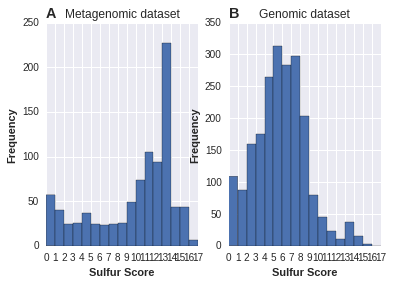

In [38]:
plt.subplot(1,2,1)
bins = np.linspace(0,17, 18)
meta.Sscore_2017.hist(bins=bins)
plt.xlim((0, 17))
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Metagenomic dataset')
plt.title('A', fontweight='bold', fontsize='x-large', loc='left')
plt.subplot(1,2,2)
bins = np.linspace(0,17, 18)
geno.Score.hist(bins=bins)
plt.xlim((0, 17))
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Genomic dataset')
plt.title('B', fontweight='bold', fontsize='x-large', loc='left')


### Boxplot by Environment 

In [39]:
# Color dictionary
env_packages = meta.env_package.unique()
#### Specific colors
mycolors = plt.cm.spectral(np.linspace(0, 1, len(env_packages)))
###
coldic = {}
for env, col in zip(env_packages, mycolors):
    coldic[env] = col
## Color of "water" env package
coldic['water'] = [0.5, 0.5, 0.5, 1]
    
    
f_coldic = {}
for feat in meta.feature.unique():
    env_p = meta[meta.feature == feat].iloc[0]['env_package']
    f_coldic[feat] = coldic[env_p]

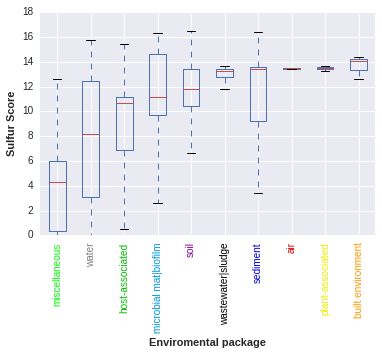

In [40]:
def median_sort(df):
    """Sort the columns acording to the median"""
    median_sorted = df.median().argsort()
    df_sorted = df.T.ix[median_sorted].T
    return df_sorted

ambientes_sorted = median_sort(ambientes)
x = ambientes_sorted.boxplot(rot=90)

plt.xlabel('Enviromental package', weight='bold')
plt.ylabel('Sulfur Score', weight='bold')

myax = plt.gca()
labels = myax.get_xticklabels()
for l in labels:
    l.set_color(coldic[l.get_text()])


### Boxplot of environment features

In [41]:
feature_ =  meta[['Sscore_2017', 'feature']]
features = feature_['feature'].unique()

mydic = {}
for f in features:
    values = feature_['Sscore_2017'][feature_['feature'] == f]
    values = values.get_values()
    mydic[f] = pd.Series(values)


In [42]:
env_feature = pd.DataFrame(mydic)


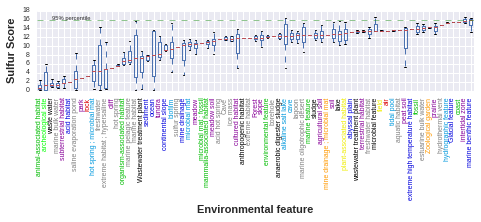

In [43]:
env_f_sorted = median_sort(env_feature)

fig = plt.figure(figsize=(6.8, 3.2))
x = env_f_sorted.boxplot(rot=90)
plt.xticks(size='x-small')
plt.yticks(size='x-small')
plt.xlabel('Environmental feature', weight='bold')
plt.ylabel('Sulfur Score', weight='bold')
plt.axhline(15.9, color='forestgreen', linewidth=0.5, ls='--')
plt.annotate( '95% percentile', (3, 16), fontsize='xx-small')
# esta función ordena mejor los elementos en el lienzo
plt.tight_layout()

myax = plt.gca()
labels = myax.get_xticklabels()
for l in labels:
    l.set_color(f_coldic[l.get_text()])

#plt.savefig('prupru.png', dpi=300)

### The planet!!!

In [44]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load metagenome metadata
data = pd.read_pickle('generaldata.pk')
# Homolgating index
meta.index = [str(i) for i in meta.index]
coord = data[['latitude', 'longitude']]
coord = coord.join(meta.Sscore_2017)

# mask for coordenates bad format
f = lambda x : ',' in str(x)
mask_coord = coord.latitude.apply(f)

print('These metagenomes are eliminated because the format of coordenates are different')
print(coord[mask_coord])
print('\n\n')
print('-------------------------------')
print('\n\n')

mask_nan = np.isnan(coord.Sscore_2017)
print('These metagenomes are eliminated because NaN SScore')
print(coord[mask_nan])

# FINAL MASK
mask = mask_coord | mask_nan
print("----\nTotal number of eliminated metagenomes: {}".format(mask.sum()))

These metagenomes are eliminated because the format of coordenates are different
              latitude    longitude  Sscore_2017
metagenome                                      
4461013.3   27.0, 24.7  81.08, 57.8       14.125
4461840.3   27.0, 24.7  81.08, 57.8       15.381



-------------------------------



These metagenomes are eliminated because NaN SScore
                 latitude      longitude  Sscore_2017
metagenome                                           
4489638.3            42.3          -71.1          NaN
4453150.3           36.49        -115.55          NaN
4489663.3            42.3          -71.1          NaN
4489631.3            42.3          -71.1          NaN
4476877.3           51.58           5.38          NaN
4489657.3            42.3          -71.1          NaN
4467995.3   -31.654180526  128.774993896          NaN
4489641.3            42.3          -71.1          NaN
4489661.3            42.3          -71.1          NaN
4489642.3            42.3          -71.

In [45]:
## Filter and formated values
f_coord = coord[~mask]

# list of longitudes and latitudes
lon = [float(i) for i in f_coord.longitude]
lat = [float(i) for i in f_coord.latitude]


In [46]:
percen_mask = meta.Sscore_2017 >= percen95
pm = percen_mask[f_coord.index]

# Ring color array. Used to circle those metagenomes abode the 95 percentile of Sscore
donuts = np.array(['none']*len(f_coord))
donuts[pm.get_values()] = 'blue'


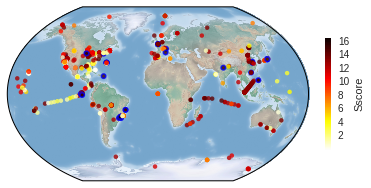

In [47]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='kav7',lon_0=0,resolution='c')

# Here we can add figure and figure layout 

# Drwaing map background, can use .bluemarble, .shadedreleaf or .etopo()
m.shadedrelief(scale=0.1)

# NOTAS
# import matplotlib as mpl
# min_ = f_coord.Sscore.min()
# max_ = f_coord.Sscore.max()
# norm = mpl.colors.Normalize(vmin=min_, vmax=max_)
# vals = norm(f_coord.Sscore)

x,y = m(lon, lat)
plt.scatter(x, y, edgecolors=donuts, c=f_coord.Sscore_2017, alpha=0.8, cmap='hot_r', linewidths=1.5)
plt.colorbar(fraction=0.05, shrink=0.5, label='Sscore')



### Legend

(0.0, 1.0, 0.0, 1.0)

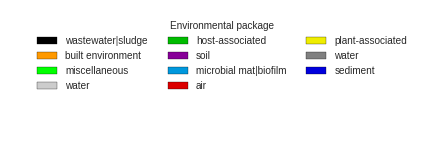

In [48]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

X = 17/2.5
Y = 5/2.5
fig = plt.figure(figsize=(X, Y))

plt.subplot(111)
#patches = []
#for env_p , col in coldic.items():
#    patch = mpatches.Patch(color=col, label=env_p)
#    patches.append(patch)
#plt.gca().legend(patches)

fakexy = (0, 0)
patches = []
labels = []
for env_p , col in coldic.items():
    patch = plt.Rectangle(fakexy, 1, 1, fc=col)
    patches.append(patch)
    labels.append(env_p)
    
plt.legend(patches, labels, ncol=3, title='Environmental package', 
          loc=2)
ax = plt.gca()
ax.axis('off')

#plt.savefig('legenda_colores.png', dpi=300)
#plt.savefig('legenda_colores.ps', dpi=300, format='ps')

### Figura final

TypeError: slice indices must be integers or None or have an __index__ method

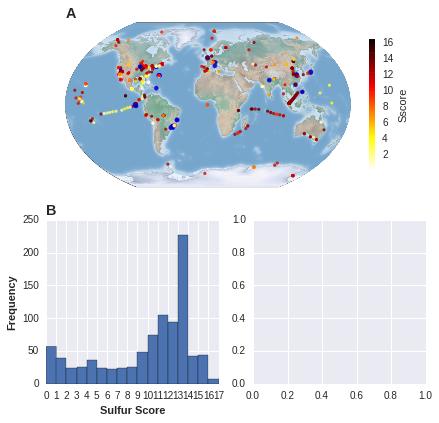

In [50]:
X = 17/2.5
Y = 25/2.5
fig = plt.figure(figsize=(X, Y))

# subplot crea sub gráficas dentro de la figura 
# el númer 221, significa en un esquema de cuadrícula
# 2 filas, 2 columnas, elemento 1

# Map
plt.subplot(311)
m = Basemap(projection='kav7', lon_0=0, resolution='c')
m.drawmapboundary(linewidth=0.5)
m.shadedrelief(scale=0.1)
x,y = m(lon, lat)
plt.scatter(x, y, 10, edgecolors=donuts, c=f_coord.Sscore_2017, alpha=0.8, cmap='hot_r', linewidths=1.5) #edgecolors='none',
plt.colorbar(fraction=0.15, shrink=0.8, pad=0.05, label='Sscore')
plt.title('A', fontweight='bold', fontsize='x-large', loc='left')

# Histogram
plt.subplot(323)
bins = np.linspace(0,17, 18)
meta.Sscore_2017.hist(bins=bins)
plt.xlim((0, 17))
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('B', fontweight='bold', fontsize='x-large', loc='left')


# Cummulative histogram
plt.subplot(324)
sns.kdeplot(meta.Sscore_2017, cumulative=True)
#sns.kdeplot(meta["Sscore_2017"], cumulative=True)
plt.xlim((0, 17))
plt.axvline(percen95, color='forestgreen', linewidth=1, ls='--')
xt = plt.xticks(bins)
plt.xlabel('Sulfur Score', weight='bold')
plt.ylabel('Cumulative frequency', weight='bold')
plt.annotate( '95% percentile', (15, 0.4), fontsize='xx-small', rotation=90)
plt.title('C', fontweight='bold', fontsize='x-large', loc='left')


# boxplot
plt.subplot(313)
x = env_f_sorted.boxplot(rot=90)
plt.xticks(size='xx-small')
#plt.yticks(size='x-small')
plt.xlabel('Environmental feature', weight='bold')
plt.ylabel('Sulfur Score', weight='bold')
plt.axhline(percen95, color='forestgreen', linewidth=1, ls='--')
plt.annotate( '95% percentile', (3, 16.2), fontsize='xx-small')
# esta función ordena mejor los elementos en el lienzo
plt.title('D', fontweight='bold', fontsize='x-large', loc='left')


myax = plt.gca()
labels = myax.get_xticklabels()
for l in labels:
    l.set_color(f_coldic[l.get_text()])


plt.tight_layout()
plt.savefig('sulfur_score_meta.png', dpi=300)
#plt.savefig('sulfur_score_meta.ps', dpi=300, format='ps')
